In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_daily = pd.read_csv('../data/processed/merged_daily.csv',parse_dates=['Date'])
df_weekly = pd.read_csv('../data/processed/merged_weekly.csv', parse_dates=['Date'])

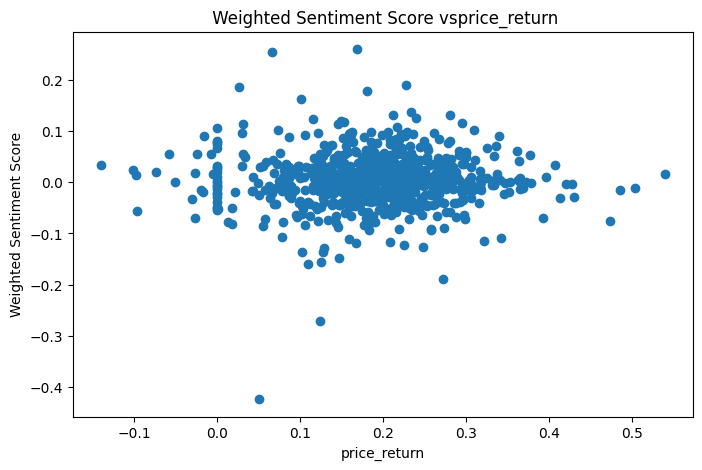

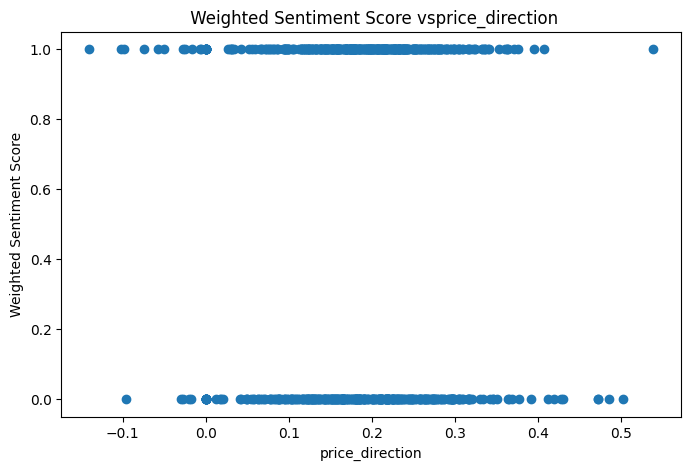

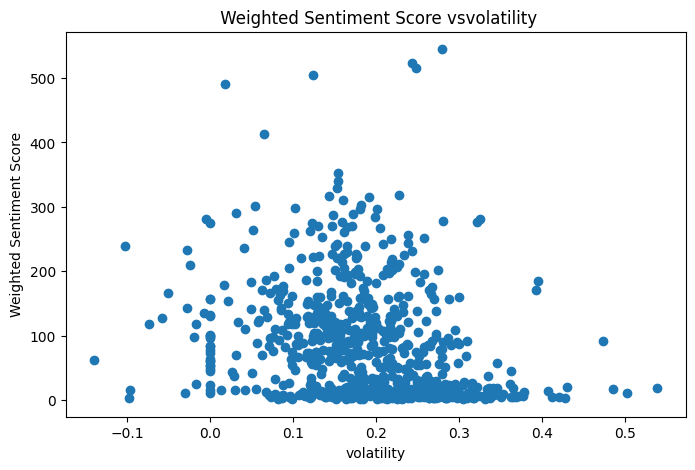

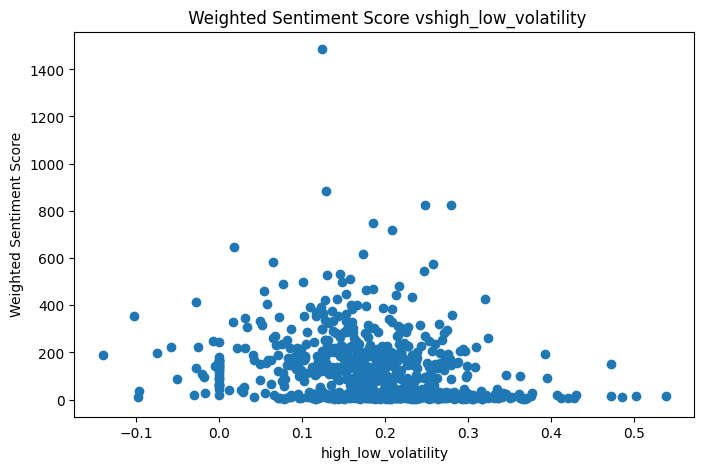

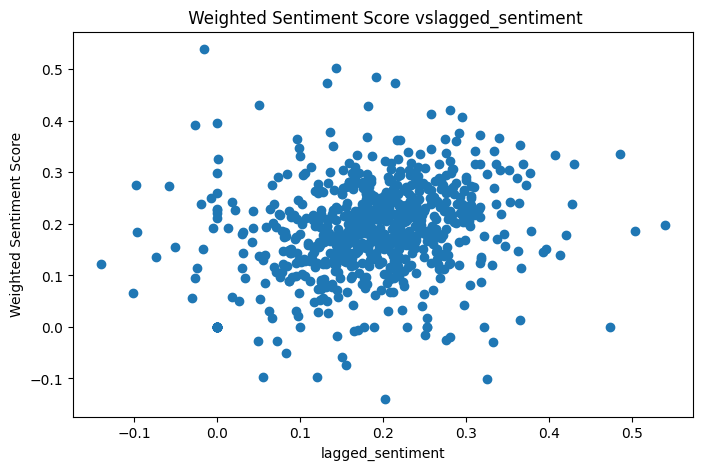

In [ ]:
columns_to_plot = ['price_return','price_direction','volatility','high_low_volatility','lagged_sentiment']

for col in columns_to_plot:
    plt.figure(figsize=(8,5))
    plt.scatter(df_daily['weighted_sentiment_score'],df_daily[col])
    plt.ylabel("Weighted Sentiment Score")
    plt.xlabel(col)
    plt.title(f' Weighted Sentiment Score vs {col}')
    plt.show()

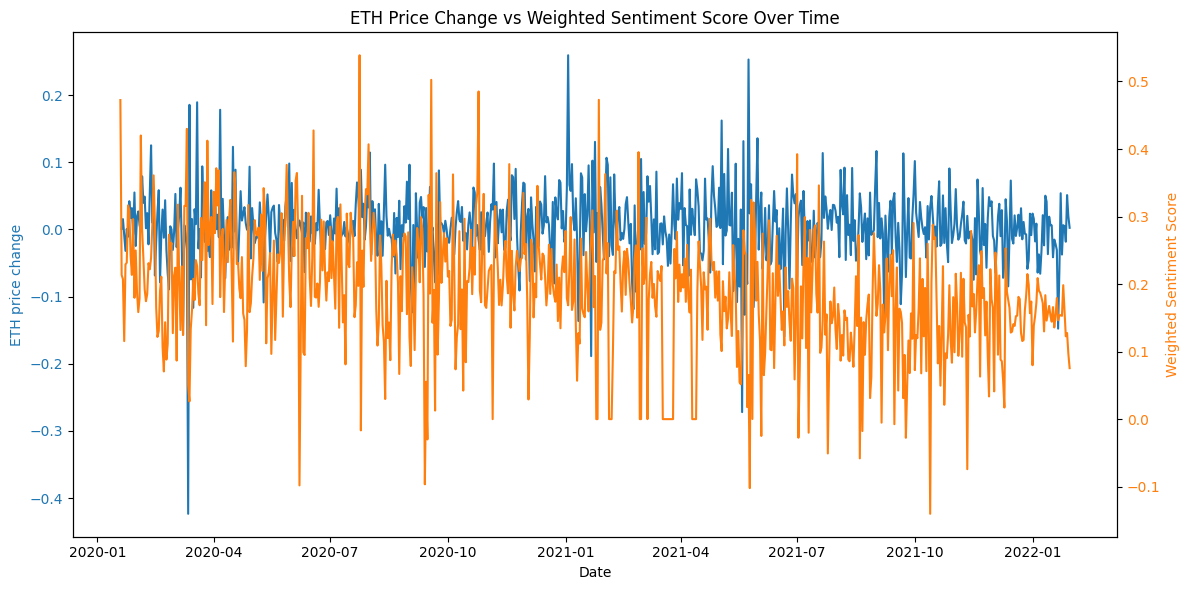

In [9]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(df_daily['Date'], df_daily['price_return'], color='tab:blue', label="ETH Price")
ax1.set_xlabel('Date')
ax1.set_ylabel('ETH price change', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(df_daily['Date'], df_daily['weighted_sentiment_score'], color='tab:orange', label='Mean Sentiment')
ax2.set_ylabel('Weighted Sentiment Score', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('ETH Price Change vs Weighted Sentiment Score Over Time')
fig.tight_layout()
plt.show()

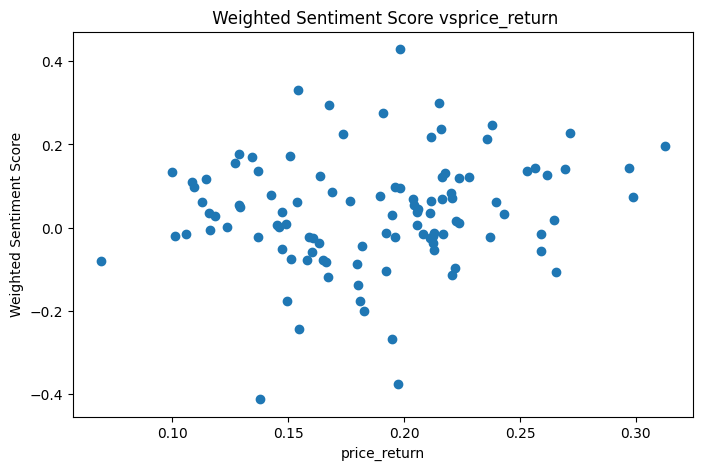

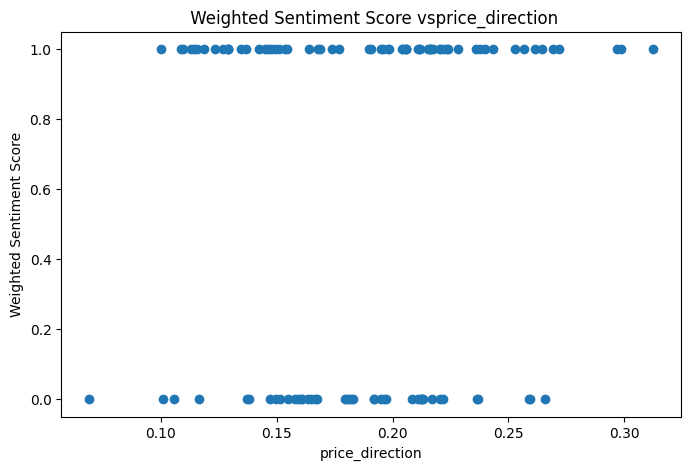

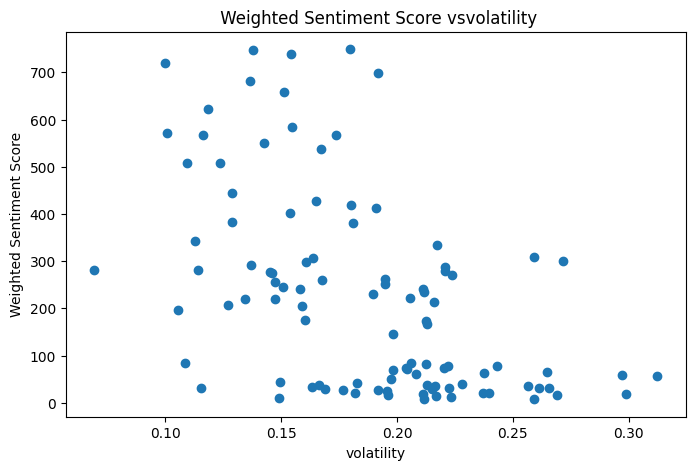

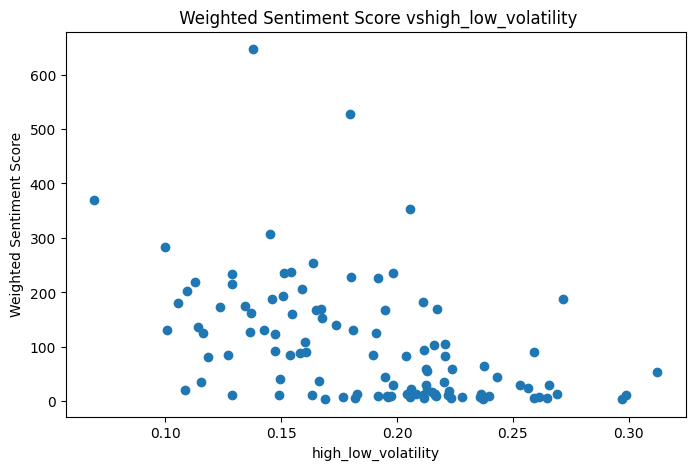

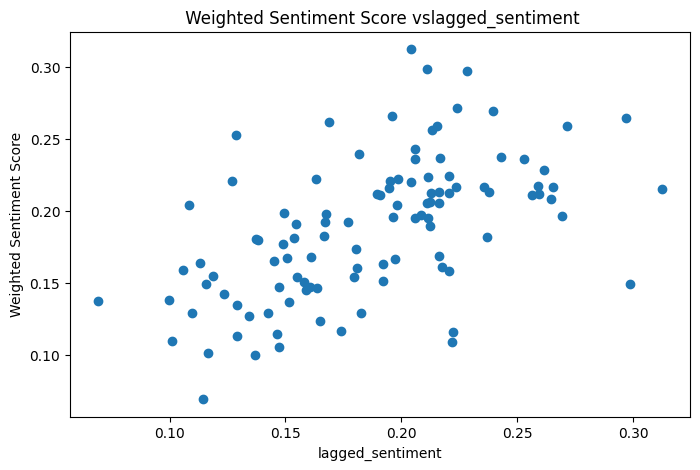

In [ ]:
# Weekly Graphing
columns_to_plot = ['price_return','price_direction','volatility','high_low_volatility','lagged_sentiment']

for col in columns_to_plot:
    plt.figure(figsize=(8,5))
    plt.scatter(df_weekly['weighted_sentiment_score'],df_weekly[col])
    plt.ylabel("Weighted Sentiment Score")
    plt.xlabel(col)
    plt.title(f' Weighted Sentiment Score vs {col}')
    plt.show()

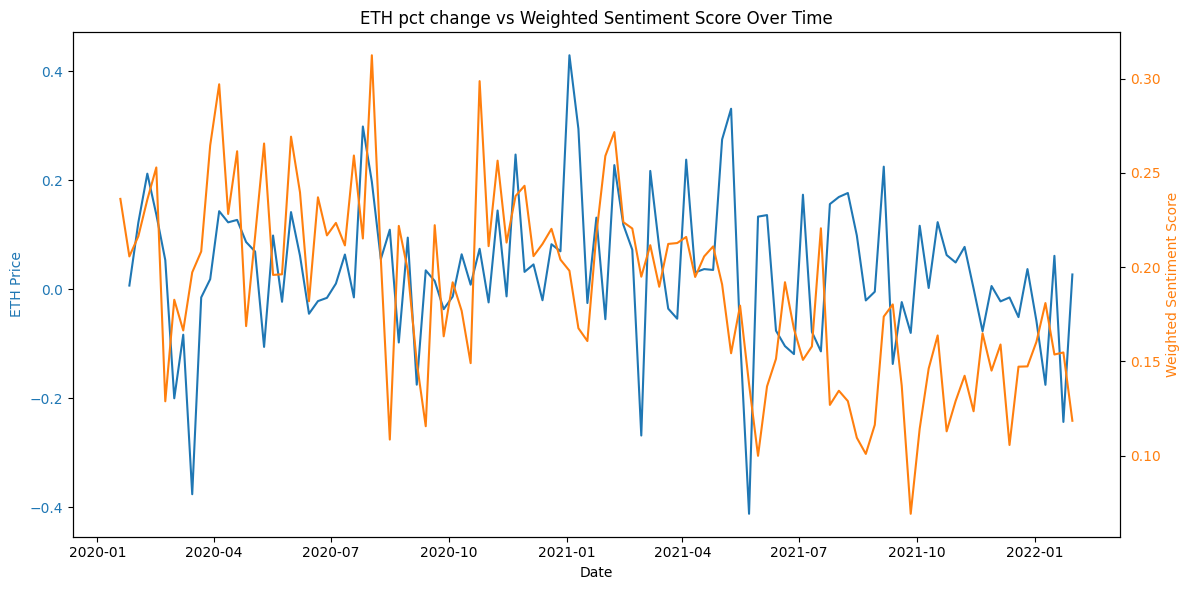

In [7]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(df_weekly['Date'], df_weekly['price_return'], color='tab:blue', label="ETH Price")
ax1.set_xlabel('Date')
ax1.set_ylabel('ETH Price', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(df_weekly['Date'], df_weekly['weighted_sentiment_score'], color='tab:orange', label='Mean Sentiment')
ax2.set_ylabel('Weighted Sentiment Score', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('ETH pct change vs Weighted Sentiment Score Over Time')
fig.tight_layout()
plt.show()

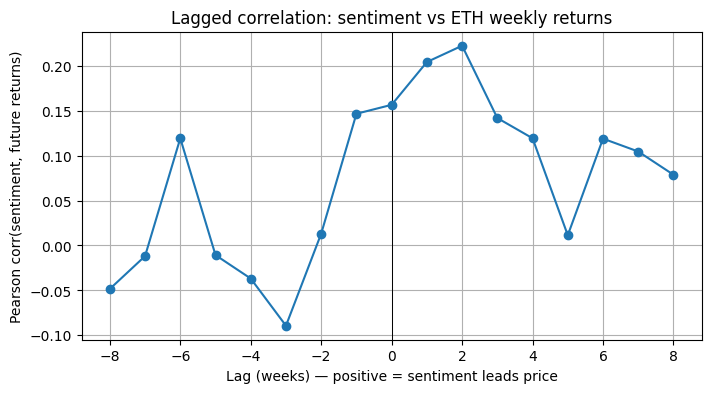

In [10]:
# Testing what leads what

lags = range(-8,9)
corrs =[]
for lag in lags:
    corr = df_weekly['weighted_sentiment_score'].corr(df_weekly['price_return'].shift(-lag))
    corrs.append(corr)

plt.figure(figsize=(8,4))
plt.axvline(0, color='k', linewidth=0.7)
plt.plot(list(lags), corrs, marker='o')
plt.xlabel('Lag (weeks) — positive = sentiment leads price')
plt.ylabel('Pearson corr(sentiment, future returns)')
plt.title('Lagged correlation: sentiment vs ETH weekly returns')
plt.grid(True)
plt.show()
